In [1]:
using quantumoptics

In [62]:
N = 500
xmin = -62.5
xmax = 70.1

basis_position = quantumoptics.particle.PositionBasis(xmin, xmax, N)
basis_momentum = quantumoptics.particle.MomentumBasis(basis_position)

xspan = quantumoptics.particle.samplepoints(basis_position)
pspan = quantumoptics.particle.samplepoints(basis_momentum)

x0 = 5.2
p0 = -2.
sigma = 1.
sigma_x = sigma/sqrt(2)
sigma_p = sigma*sqrt(2)

psix0 = quantumoptics.particle.gaussianstate(basis_position, x0, p0, sigma)
psix0_fft = quantumoptics.particle.transformation(basis_position, basis_momentum, psix0)
psip0 = quantumoptics.particle.gaussianstate(basis_momentum, x0, p0, sigma)

opx_p = quantumoptics.particle.momentumoperator(basis_position)
opx_x = quantumoptics.particle.positionoperator(basis_position)

opp_p = quantumoptics.particle.momentumoperator(basis_momentum)
opp_x = quantumoptics.particle.positionoperator(basis_momentum)


println("<p> = ", expect(opx_p, psix0))
println("<x> = ", expect(opx_x, psix0))

println("<p>fft = ", expect(opp_p, psix0_fft))
println("<p>p0 = ", expect(opp_p, psip0))
println("<x>fft = ", expect(opp_x, psix0_fft))
println("<x>p0 = ", expect(opp_x, psip0))

println(norm(psix0_fft))
println(norm(psip0))

np_x0fft = real(dagger(psix0_fft).data .* psix0_fft.data);
np_p0 = real(dagger(psip0).data .* psip0.data);
nothing
# println(psix0_fft.data[100])
# println(psip0.data[100])
# println(abs(psix0_fft.data[100]))
# println(abs(psip0.data[100]))

<p> = -1.9878189309743584 + 4.219786880597495e-17im
<x> = 5.199999999999968 + 1.1061403257991966e-17im
<p>fft = -2.0000000000000426 - 4.043286063312771e-18im
<p>p0 = -2.000000000000068 + 6.364190171335671e-18im
<x>fft = 5.199246219973978 + 1.2535431728494872e-16im
<x>p0 = 5.199246219974009 + 3.864719620488104e-17im
0.9999999999999993
1.0000000000000002


In [63]:
psi_fft2 = Ket(basis_momentum)
pspan = quantumoptics.particle.samplepoints(basis_momentum)
xspan = quantumoptics.particle.samplepoints(basis_position)
for i=1:N
    psi_fft2.data[i] = sum(exp(-1im*pspan[i]*xspan).*psix0.data)/sqrt(N)
end
#print(abs(psi_fft2.data)- abs(psix0_fft.data))

In [43]:
sum(psix0.data)/sqrt(N)

0.09917071924796274 + 1.545462681861534e-17im

In [68]:
MomentumBasis = quantumoptics.particle.MomentumBasis
PositionBasis = quantumoptics.particle.PositionBasis
spacing = quantumoptics.particle.spacing
samplepoints = quantumoptics.particle.samplepoints

function transformation(b1::MomentumBasis, b2::PositionBasis, psi::Ket)
    Lp = (b1.pmax - b1.pmin)
    dx = spacing(b2)
    if b1.N != b2.N || abs(2*pi/dx - Lp)/Lp > 1e-12
        throw(IncompatibleBases())
    end
    N = b1.N
    psi_shifted = exp(1im*b2.xmin*(samplepoints(b1)-b1.pmin)).*psi.data
    psi_fft = exp(1im*b1.pmin*samplepoints(b2)).*ifft(psi_shifted)*sqrt(N)
    return Ket(b2, psi_fft)
end

function transformation(b1::PositionBasis, b2::MomentumBasis, psi::Ket)
    Lx = (b1.xmax - b1.xmin)
    dp = spacing(b2)
    if b1.N != b2.N || abs(2*pi/dp - Lx)/Lx > 1e-12
        throw(IncompatibleBases())
    end
    N = b1.N
    psi_shifted = exp(-1im*b2.pmin*(samplepoints(b1)-b1.xmin)).*psi.data
    psi_fft = exp(-1im*b1.xmin*samplepoints(b2)).*fft(psi_shifted)/sqrt(N)
    return Ket(b2, psi_fft)
end

psix0_fft2 = transformation(basis_position, basis_momentum, psix0)
println(maximum(abs(psix0_fft2.data) - abs(psip0.data)))
# psi2 = transformation(basis_momentum, basis_position, psi_fft2)
# nx2_ = real(dagger(psi2).data .* psi2.data)
# np2 = real(dagger(psi_fft2).data .* psi_fft2.data);

4.5737853781842865e-15


In [6]:
using PyPlot

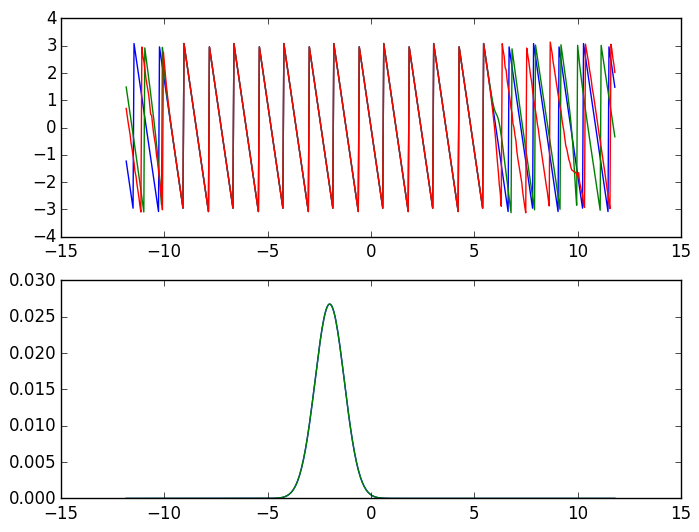

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7bad8d62b0>

In [69]:
subplot(2,1,1)
plot(pspan, angle(psip0.data))
plot(pspan, angle(psix0_fft2.data))
plot(pspan, angle(psi_fft2.data))
# plot(xspan, nx)
# plot(xspan, nx_)
# plot(xspan, nx2_)
subplot(2,1,2)
plot(pspan, np_x0fft)
plot(pspan, np_p0)

In [11]:
println(norm(psip0 - psix0_fft2))
println(norm(psip0 - psi_fft2))

2.0644071045301102e-13
3.251827983266827e-13
